## Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nuria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

He elegido el libro The War of the Worlds y para el ejercicio he seleccionado el primer capítulo.
 
https://www.gutenberg.org/cache/epub/36/pg36-images.html

In [3]:
text = """No one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than man’s and yet as mortal as his own; that as men busied themselves about their various concerns they were scrutinised and studied, perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water. With infinite complacency men went to and fro over this globe about their little affairs, serene in their assurance of their empire over matter. It is possible that the infusoria under the microscope do the same. No one gave a thought to the older worlds of space as sources of human danger, or thought of them only to dismiss the idea of life upon them as impossible or improbable. It is curious to recall some of the mental habits of those departed days. At most terrestrial men fancied there might be other men upon Mars, perhaps inferior to themselves and ready to welcome a missionary enterprise. Yet across the gulf of space, minds that are to our minds as ours are to those of the beasts that perish, intellects vast and cool and unsympathetic, regarded this earth with envious eyes, and slowly and surely drew their plans against us. And early in the twentieth century came the great disillusionment.

The planet Mars, I scarcely need remind the reader, revolves about the sun at a mean distance of 140,000,000 miles, and the light and heat it receives from the sun is barely half of that received by this world. It must be, if the nebular hypothesis has any truth, older than our world; and long before this earth ceased to be molten, life upon its surface must have begun its course. The fact that it is scarcely one seventh of the volume of the earth must have accelerated its cooling to the temperature at which life could begin. It has air and water and all that is necessary for the support of animated existence.

Yet so vain is man, and so blinded by his vanity, that no writer, up to the very end of the nineteenth century, expressed any idea that intelligent life might have developed there far, or indeed at all, beyond its earthly level. Nor was it generally understood that since Mars is older than our earth, with scarcely a quarter of the superficial area and remoter from the sun, it necessarily follows that it is not only more distant from time’s beginning but nearer its end.

The secular cooling that must someday overtake our planet has already gone far indeed with our neighbour. Its physical condition is still largely a mystery, but we know now that even in its equatorial region the midday temperature barely approaches that of our coldest winter. Its air is much more attenuated than ours, its oceans have shrunk until they cover but a third of its surface, and as its slow seasons change huge snowcaps gather and melt about either pole and periodically inundate its temperate zones. That last stage of exhaustion, which to us is still incredibly remote, has become a present-day problem for the inhabitants of Mars. The immediate pressure of necessity has brightened their intellects, enlarged their powers, and hardened their hearts. And looking across space with instruments, and intelligences such as we have scarcely dreamed of, they see, at its nearest distance only 35,000,000 of miles sunward of them, a morning star of hope, our own warmer planet, green with vegetation and grey with water, with a cloudy atmosphere eloquent of fertility, with glimpses through its drifting cloud wisps of broad stretches of populous country and narrow, navy-crowded seas.

And we men, the creatures who inhabit this earth, must be to them at least as alien and lowly as are the monkeys and lemurs to us. The intellectual side of man already admits that life is an incessant struggle for existence, and it would seem that this too is the belief of the minds upon Mars. Their world is far gone in its cooling and this world is still crowded with life, but crowded only with what they regard as inferior animals. To carry warfare sunward is, indeed, their only escape from the destruction that, generation after generation, creeps upon them.

And before we judge of them too harshly we must remember what ruthless and utter destruction our own species has wrought, not only upon animals, such as the vanished bison and the dodo, but upon its inferior races. The Tasmanians, in spite of their human likeness, were entirely swept out of existence in a war of extermination waged by European immigrants, in the space of fifty years. Are we such apostles of mercy as to complain if the Martians warred in the same spirit?

The Martians seem to have calculated their descent with amazing subtlety—their mathematical learning is evidently far in excess of ours—and to have carried out their preparations with a well-nigh perfect unanimity. Had our instruments permitted it, we might have seen the gathering trouble far back in the nineteenth century. Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that for countless centuries Mars has been the star of war—but failed to interpret the fluctuating appearances of the markings they mapped so well. All that time the Martians must have been getting ready.

During the opposition of 1894 a great light was seen on the illuminated part of the disk, first at the Lick Observatory, then by Perrotin of Nice, and then by other observers. English readers heard of it first in the issue of Nature dated August 2. I am inclined to think that this blaze may have been the casting of the huge gun, in the vast pit sunk into their planet, from which their shots were fired at us. Peculiar markings, as yet unexplained, were seen near the site of that outbreak during the next two oppositions.

The storm burst upon us six years ago now. As Mars approached opposition, Lavelle of Java set the wires of the astronomical exchange palpitating with the amazing intelligence of a huge outbreak of incandescent gas upon the planet. It had occurred towards midnight of the twelfth; and the spectroscope, to which he had at once resorted, indicated a mass of flaming gas, chiefly hydrogen, moving with an enormous velocity towards this earth. This jet of fire had become invisible about a quarter past twelve. He compared it to a colossal puff of flame suddenly and violently squirted out of the planet, “as flaming gases rushed out of a gun.”

A singularly appropriate phrase it proved. Yet the next day there was nothing of this in the papers except a little note in the Daily Telegraph, and the world went in ignorance of one of the gravest dangers that ever threatened the human race. I might not have heard of the eruption at all had I not met Ogilvy, the well-known astronomer, at Ottershaw. He was immensely excited at the news, and in the excess of his feelings invited me up to take a turn with him that night in a scrutiny of the red planet.

In spite of all that has happened since, I still remember that vigil very distinctly: the black and silent observatory, the shadowed lantern throwing a feeble glow upon the floor in the corner, the steady ticking of the clockwork of the telescope, the little slit in the roof—an oblong profundity with the stardust streaked across it. Ogilvy moved about, invisible but audible. Looking through the telescope, one saw a circle of deep blue and the little round planet swimming in the field. It seemed such a little thing, so bright and small and still, faintly marked with transverse stripes, and slightly flattened from the perfect round. But so little it was, so silvery warm—a pin’s head of light! It was as if it quivered, but really this was the telescope vibrating with the activity of the clockwork that kept the planet in view.

As I watched, the planet seemed to grow larger and smaller and to advance and recede, but that was simply that my eye was tired. Forty millions of miles it was from us—more than forty millions of miles of void. Few people realise the immensity of vacancy in which the dust of the material universe swims.

Near it in the field, I remember, were three faint points of light, three telescopic stars infinitely remote, and all around it was the unfathomable darkness of empty space. You know how that blackness looks on a frosty starlight night. In a telescope it seems far profounder. And invisible to me because it was so remote and small, flying swiftly and steadily towards me across that incredible distance, drawing nearer every minute by so many thousands of miles, came the Thing they were sending us, the Thing that was to bring so much struggle and calamity and death to the earth. I never dreamed of it then as I watched; no one on earth dreamed of that unerring missile.

That night, too, there was another jetting out of gas from the distant planet. I saw it. A reddish flash at the edge, the slightest projection of the outline just as the chronometer struck midnight; and at that I told Ogilvy and he took my place. The night was warm and I was thirsty, and I went stretching my legs clumsily and feeling my way in the darkness, to the little table where the siphon stood, while Ogilvy exclaimed at the streamer of gas that came out towards us.

That night another invisible missile started on its way to the earth from Mars, just a second or so under twenty-four hours after the first one. I remember how I sat on the table there in the blackness, with patches of green and crimson swimming before my eyes. I wished I had a light to smoke by, little suspecting the meaning of the minute gleam I had seen and all that it would presently bring me. Ogilvy watched till one, and then gave it up; and we lit the lantern and walked over to his house. Down below in the darkness were Ottershaw and Chertsey and all their hundreds of people, sleeping in peace.

He was full of speculation that night about the condition of Mars, and scoffed at the vulgar idea of its having inhabitants who were signalling us. His idea was that meteorites might be falling in a heavy shower upon the planet, or that a huge volcanic explosion was in progress. He pointed out to me how unlikely it was that organic evolution had taken the same direction in the two adjacent planets.

“The chances against anything manlike on Mars are a million to one,” he said.

Hundreds of observers saw the flame that night and the night after about midnight, and again the night after; and so for ten nights, a flame each night. Why the shots ceased after the tenth no one on earth has attempted to explain. It may be the gases of the firing caused the Martians inconvenience. Dense clouds of smoke or dust, visible through a powerful telescope on earth as little grey, fluctuating patches, spread through the clearness of the planet’s atmosphere and obscured its more familiar features.

Even the daily papers woke up to the disturbances at last, and popular notes appeared here, there, and everywhere concerning the volcanoes upon Mars. The seriocomic periodical Punch, I remember, made a happy use of it in the political cartoon. And, all unsuspected, those missiles the Martians had fired at us drew earthward, rushing now at a pace of many miles a second through the empty gulf of space, hour by hour and day by day, nearer and nearer. It seems to me now almost incredibly wonderful that, with that swift fate hanging over us, men could go about their petty concerns as they did. I remember how jubilant Markham was at securing a new photograph of the planet for the illustrated paper he edited in those days. People in these latter times scarcely realise the abundance and enterprise of our nineteenth-century papers. For my own part, I was much occupied in learning to ride the bicycle, and busy upon a series of papers discussing the probable developments of moral ideas as civilisation progressed.

One night (the first missile then could scarcely have been 10,000,000 miles away) I went for a walk with my wife. It was starlight and I explained the Signs of the Zodiac to her, and pointed out Mars, a bright dot of light creeping zenithward, towards which so many telescopes were pointed. It was a warm night. Coming home, a party of excursionists from Chertsey or Isleworth passed us singing and playing music. There were lights in the upper windows of the houses as the people went to bed. From the railway station in the distance came the sound of shunting trains, ringing and rumbling, softened almost into melody by the distance. My wife pointed out to me the brightness of the red, green, and yellow signal lights hanging in a framework against the sky. It seemed so safe and tranquil.

"""
print(text)

No one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than man’s and yet as mortal as his own; that as men busied themselves about their various concerns they were scrutinised and studied, perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water. With infinite complacency men went to and fro over this globe about their little affairs, serene in their assurance of their empire over matter. It is possible that the infusoria under the microscope do the same. No one gave a thought to the older worlds of space as sources of human danger, or thought of them only to dismiss the idea of life upon them as impossible or improbable. It is curious to recall some of the mental habits of those departed days. At most terrestrial men fancied there might be other men upon Mars, perhaps inferior to themselves and ready to welcome 

In [4]:
# minusculas y Tokenize the text(palabaras individuales)
lower = text.lower()
tokens = word_tokenize(lower)
print(f'\nNº palabras: {len(tokens)}')
print(tokens)


Nº palabras: 2456
['no', 'one', 'would', 'have', 'believed', 'in', 'the', 'last', 'years', 'of', 'the', 'nineteenth', 'century', 'that', 'this', 'world', 'was', 'being', 'watched', 'keenly', 'and', 'closely', 'by', 'intelligences', 'greater', 'than', 'man', '’', 's', 'and', 'yet', 'as', 'mortal', 'as', 'his', 'own', ';', 'that', 'as', 'men', 'busied', 'themselves', 'about', 'their', 'various', 'concerns', 'they', 'were', 'scrutinised', 'and', 'studied', ',', 'perhaps', 'almost', 'as', 'narrowly', 'as', 'a', 'man', 'with', 'a', 'microscope', 'might', 'scrutinise', 'the', 'transient', 'creatures', 'that', 'swarm', 'and', 'multiply', 'in', 'a', 'drop', 'of', 'water', '.', 'with', 'infinite', 'complacency', 'men', 'went', 'to', 'and', 'fro', 'over', 'this', 'globe', 'about', 'their', 'little', 'affairs', ',', 'serene', 'in', 'their', 'assurance', 'of', 'their', 'empire', 'over', 'matter', '.', 'it', 'is', 'possible', 'that', 'the', 'infusoria', 'under', 'the', 'microscope', 'do', 'the', '

Como quedan simbolos los eliminaremos para poder seguir sin estos.

In [5]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

# Tokens sin símbolos
words = tokenizer.tokenize(lower)

print(f'\nNº palabra sin símbolos: {len(words)}')
print(words)


Nº palabra sin símbolos: 2237
['no', 'one', 'would', 'have', 'believed', 'in', 'the', 'last', 'years', 'of', 'the', 'nineteenth', 'century', 'that', 'this', 'world', 'was', 'being', 'watched', 'keenly', 'and', 'closely', 'by', 'intelligences', 'greater', 'than', 'man', 's', 'and', 'yet', 'as', 'mortal', 'as', 'his', 'own', 'that', 'as', 'men', 'busied', 'themselves', 'about', 'their', 'various', 'concerns', 'they', 'were', 'scrutinised', 'and', 'studied', 'perhaps', 'almost', 'as', 'narrowly', 'as', 'a', 'man', 'with', 'a', 'microscope', 'might', 'scrutinise', 'the', 'transient', 'creatures', 'that', 'swarm', 'and', 'multiply', 'in', 'a', 'drop', 'of', 'water', 'with', 'infinite', 'complacency', 'men', 'went', 'to', 'and', 'fro', 'over', 'this', 'globe', 'about', 'their', 'little', 'affairs', 'serene', 'in', 'their', 'assurance', 'of', 'their', 'empire', 'over', 'matter', 'it', 'is', 'possible', 'that', 'the', 'infusoria', 'under', 'the', 'microscope', 'do', 'the', 'same', 'no', 'one'

In [6]:
#FRECUENCIA
# Calcular la frecuencia de palabras
frecuencia = FreqDist(words)

print("Palabras más frecuentes:")
for palabra, count in frecuencia.most_common(10):
    print(f"{palabra}: {count}")

Palabras más frecuentes:
the: 168
of: 106
and: 84
a: 48
that: 47
in: 41
to: 41
it: 37
as: 26
was: 25


las palabras más comunes que aparecen son stopwords.

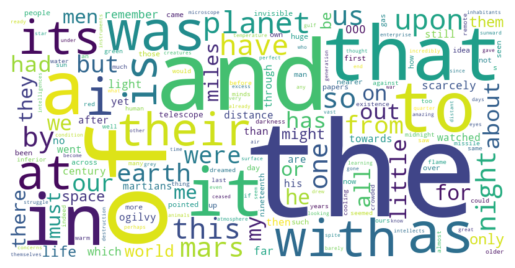

In [7]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(frecuencia)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

en la visualización también podemos observar que las pabaras más comunes son stopwords.

## Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [9]:
import nltk
nltk.download('stopwords')

#Remove stop words - palabras vacías que son consideradas como términos que generalmente no aportan un significado importante para el análisis
filtered_tokens = [token for token in words if token not in stopwords.words('english')]
print(f'\nNº palabras sin stopwords: {len(filtered_tokens)}')

print(" ".join(filtered_tokens))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nuria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Nº palabras sin stopwords: 1120
one would believed last years nineteenth century world watched keenly closely intelligences greater man yet mortal men busied various concerns scrutinised studied perhaps almost narrowly man microscope might scrutinise transient creatures swarm multiply drop water infinite complacency men went fro globe little affairs serene assurance empire matter possible infusoria microscope one gave thought older worlds space sources human danger thought dismiss idea life upon impossible improbable curious recall mental habits departed days terrestrial men fancied might men upon mars perhaps inferior ready welcome missionary enterprise yet across gulf space minds minds beasts perish intellects vast cool unsympathetic regarded earth envious eyes slowly surely drew plans us early twentieth century came great disillusionment planet mars scarcely need remind reader revolves sun mean distance 140 000 000 miles light heat receives sun barely half received world must nebul

In [10]:
frecuencia2= FreqDist(filtered_tokens)
print("Palabras más frecuentes sin stopwords:")
for palabra, count in frecuencia2.most_common(10):
    print(f"{palabra}: {count}")

Palabras más frecuentes sin stopwords:
planet: 15
upon: 13
mars: 12
us: 12
night: 12
one: 11
earth: 11
little: 9
men: 7
miles: 7


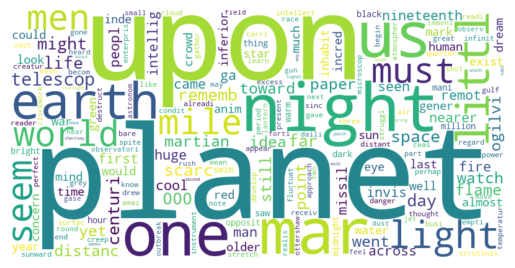

In [34]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(frecuencia2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

al eliminar los stopword las palabras que nos salen con más frecuencias son palabras relacionadas la trama del libro,  ya que el libro describe una invasión de marcianos a la Tierra.
Por lo que tiene sentido que aparezcan palabras como "planet, mars, upon, night,...".
La presencia de "us" y "men" puede indicar un contexto más específico relacionado con la humanidad.

#### Stemming
El stemming es un proceso en el procesamiento de lenguaje natural (PLN) que implica reducir una palabra a su forma base o raíz, eliminando sufijos y prefijos. El objetivo del stemming es reducir palabras derivadas a una forma común para que palabras relacionadas compartan la misma raíz, facilitando así la búsqueda y el análisis de texto.

In [19]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Crear un objeto PorterStemmer
stemmer = PorterStemmer()

# Aplicar stemming a cada palabra
palabras_stem = [stemmer.stem(palabra) for palabra in filtered_tokens]

# Join the tokens back into a string
processed_text = ' '.join(palabras_stem)
processed_text



'one would believ last year nineteenth centuri world watch keenli close intellig greater man yet mortal men busi variou concern scrutinis studi perhap almost narrowli man microscop might scrutinis transient creatur swarm multipli drop water infinit complac men went fro globe littl affair seren assur empir matter possibl infusoria microscop one gave thought older world space sourc human danger thought dismiss idea life upon imposs improb curiou recal mental habit depart day terrestri men fanci might men upon mar perhap inferior readi welcom missionari enterpris yet across gulf space mind mind beast perish intellect vast cool unsympathet regard earth enviou eye slowli sure drew plan us earli twentieth centuri came great disillusion planet mar scarc need remind reader revolv sun mean distanc 140 000 000 mile light heat receiv sun bare half receiv world must nebular hypothesi truth older world long earth ceas molten life upon surfac must begun cours fact scarc one seventh volum earth must 

In [35]:
frecuencia3= FreqDist(palabras_stem)
print("Palabras raíz:")
for palabra, count in frecuencia3.most_common(10):
    print(f"{palabra}: {count}")

Palabras raíz:
planet: 16
upon: 13
night: 13
mar: 12
us: 12
one: 11
earth: 11
littl: 9
light: 8
world: 7


Se observa una coincidencia sustancial. Las palabras "planet," "upon," "night," "mars," "us," y "earth" son comunes en ambas listas, lo que sugiere que estas palabras tienen una presencia destacada en el conjunto de datos.

##  Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

In [20]:
import nltk
nltk.download('vader_lexicon')

# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    
    # Determine sentiment based on the compound score
    if scores['compound'] >= 0.05:
        sentiment = 'Positivo'
    elif scores['compound'] <= -0.05:
        sentiment = 'Negativo'
    else:
        sentiment = 'Neutral'
    
    return sentiment

# Example of how to use the get_sentiment function
sentiment_result = get_sentiment(processed_text)
print(f"Sentimiento: {sentiment_result}")

Sentimiento: Positivo


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nuria\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
scores = analyzer.polarity_scores(processed_text)
scores

{'neg': 0.079, 'neu': 0.823, 'pos': 0.098, 'compound': 0.8701}

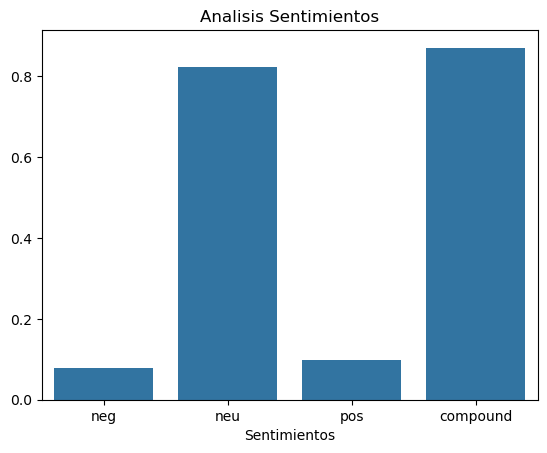

In [26]:
sns.barplot(scores)
plt.xlabel ('Sentimientos')
plt.title ('Analisis Sentimientos')
plt.show()

- Negativo ('neg'): 8% sugiere que hay una pequeña presencia de contenido negativo.
- Neutral ('neu'): 82% indica que la mayoría del contenido es neutro.
- Positivo ('pos'): 10% indica que hay un componente positivo en el texto.
- Compound Score ('compound'): 0.8701. El puntaje compuesto es una combinación de los puntajes negativos, neutrales y positivos, normalizado a un rango entre -1 (muy negativo) y 1 (muy positivo). Un valor de 0.87 sugiere que el texto tiende a ser positivo.